# 결정트리 (Descision Tree)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')
wine.head()
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
y = wine['class'].to_numpy()

# 훈련:테스트 = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [4]:
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [5]:
# 로지스틱 회귀로 함 분류해보기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

print('훈련점수: ', lr.score(X_train_scaled, y_train))
print('테스트점수: ', lr.score(X_test_scaled, y_test))

# 각 클래스랑 확률들
print(lr.classes_)
lr.predict_proba(X_train_scaled[:5])

# 알코올에 곱하고, 당도에 곱하고, 산도에 곱해서 나온 거야 -> 설명하기 어렵...
print(lr.coef_, lr.intercept_)

훈련점수:  0.7808350971714451
테스트점수:  0.7776923076923077
[0. 1.]
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [6]:
# 결정트리로 분류 드가자 -> 직관적임!!
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

print('훈련점수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))

훈련점수:  0.996921300750433
테스트점수:  0.8592307692307692


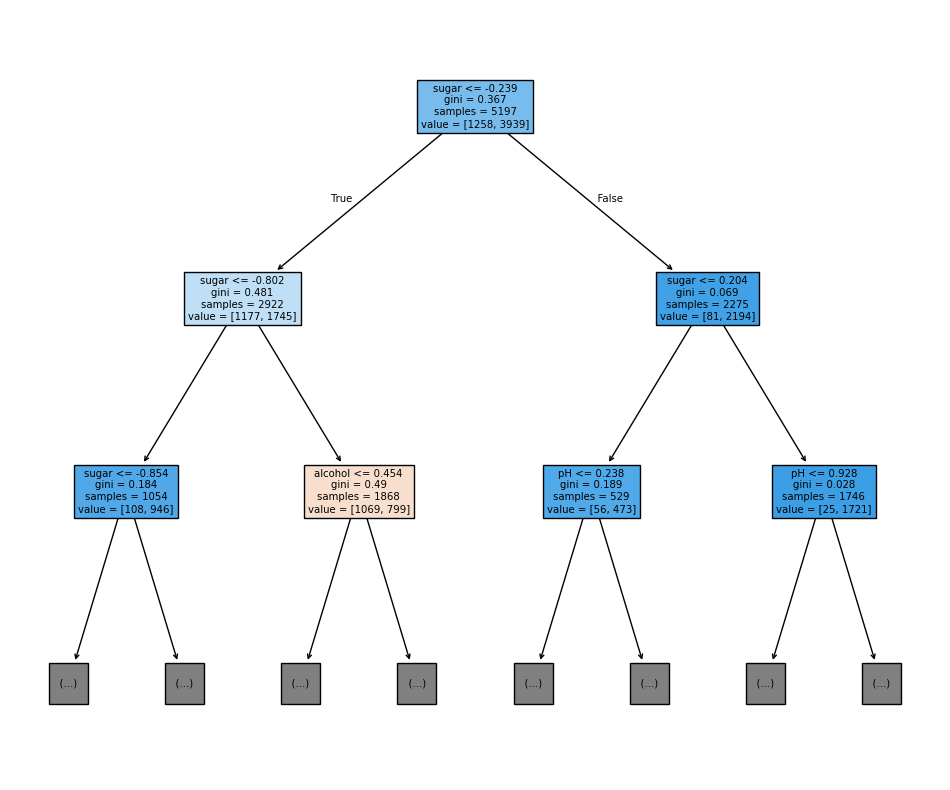

지니 불순도 0.3669367279393918


In [7]:
from sklearn.tree import plot_tree
# 트리의 시각화..!

plt.figure(figsize= (12, 10))
            # 레벨 2까지만 보여줘, 내용 채워서
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 지니 불순도 1 - (음성클래스비율^2 + 양성클래스비율^2)
# 0.5에 가까울 수록 분류가 잘 안 됐다~
# 0이면 순수노드
gini = 1 - ((1258/5197)**2 + (3939/5197)**2)
print('지니 불순도', gini)

훈련점수:  0.8572253223013276
테스트점수:  0.8484615384615385


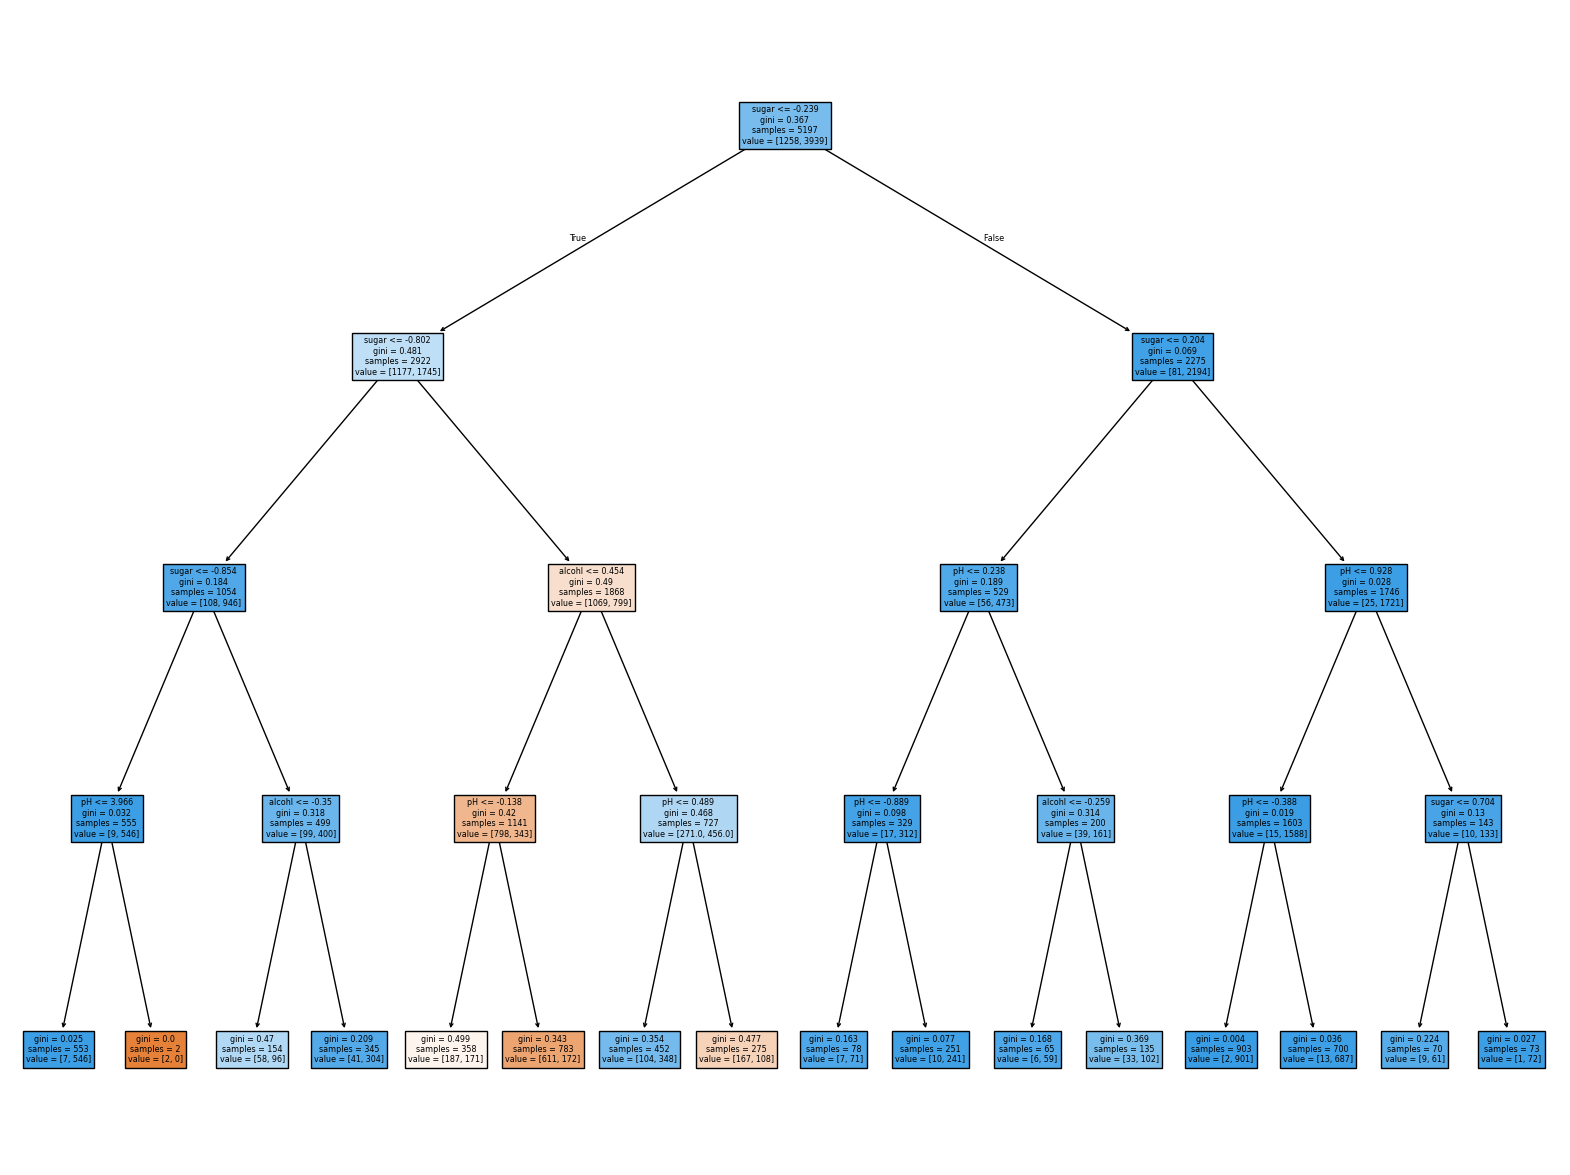

In [8]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)

print('훈련점수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohl', 'sugar', 'pH'])
plt.show()

## 교차 검증 (Cross Validation)
- 테스트 셋은 모델 검증 마지막 단계에서 1번만 확인하는 것
- 테스트 셋 점수를 계속 점검하는 것은 옳지 않다....


In [9]:
# 훈련셋(sub) | 검증셋(val) | 테스트셋(test)
# 80%                          20%
# 60%            20%           20%

In [10]:
wine = pd.read_csv('./wine.csv')
X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [13]:
X_sub.shape

(3897, 3)

In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub, y_sub)
print('훈련', dt.score(X_sub, y_sub))
print('검증', dt.score(X_val, y_val))

훈련 0.9969207082371054
검증 0.86


In [15]:
# K-Fold 교차 검증 (알아서 데이터 쪼개서 훈련-검증 데이터를 바꿔가며 훈련하고, 점수 평균 사용)
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
display(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00786519, 0.00667834, 0.0083375 , 0.00697613, 0.00728369]),
 'score_time': array([0.00174451, 0.00151753, 0.00177336, 0.00357389, 0.00156093]),
 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

0.855300214703487


In [16]:
# 폴드 기본값 5가 아닌 다른 값을 쓰고 싶을 경우 (불균형한 분포일 때)
from sklearn.model_selection import StratifiedKFold
#             계층별 KFold           접기 전에 최초 1회 셔플링    
splitter = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
np.mean(scores['test_score'])

np.float64(0.867613013191048)

In [17]:
# 폴드 기본값 5가 아닌 다른 값을 쓰고 싶을 경우 (불균형 아닐 때)
scores = cross_validate(dt, X_train, y_train, cv=10)
print(np.mean(scores['test_score']))

0.8616407292129834


## 하이퍼 파라미터 튜닝
- GridSearchCV: 모든 후보 조합을 다 시험해서 가장 성능 좋은 조합을 찾아주는 함수
1. GridSearch 을 진행할 하이퍼 파라미터 선택
1. 그리드 서치 수행(fit)
1. 최적 조합을 찾고, `gs` 객체에 저장됨.
1. 그리드 서치는 최상의 매개변수에서, 전체 훈련 세트를 사용해 최종 모델을 훈련

In [18]:
from sklearn.model_selection import GridSearchCV

# min_impurity_decrease → 노드를 나누는 기준 불순도 최소값
params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006],
}
                  
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # 모델
    param_grid=params,  # 확인할 하이퍼파라미터의 이름: 값들
    n_jobs=-1,  # CPU 최대 코어
)

gs.fit(X_train, y_train)


# Grid Search 결과 가장 좋은 파라미터 조합으로 모델 만들기
print(gs.best_params_, gs.cv_results_['mean_test_score'])

dt = gs.best_estimator_
dt.score(X_train, y_train)

{'min_impurity_decrease': 0.0001} [0.86819297 0.86453617 0.86492226 0.86780891 0.86761605 0.86338306]


0.9615162593804117

In [19]:
# 한 번에 여러 하이퍼파라미터를 모든 조합으로 시험

params = {
    # 노드 분할을 위한 최소 불순도
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    # 트리 깊이
    'max_depth': range(5, 20, 1),
    # 노드를 나누기 위한 최소 샘플 수
    'min_samples_split': range(2, 100, 10),
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [20]:
# 내부 교차검증 결과 가장 높은 평균 점수
np.max(gs.cv_results_['mean_test_score'])

# 모든 하이퍼파라미터 교차검증 끝에 찾은 학습이 끝난 최고의 모델
# best_estimator_ → 최적 파라미터로 전체 훈련셋 학습 완료 모델
dt_best = gs.best_estimator_
# 로 아껴놨던 테스트 진행 -> 점수
dt_best.score(X_test, y_test)

0.8615384615384616

### 8/29 randint, uniform

In [ ]:
from scipy.stats import uniform, randint

# 주어진 범위에서 고르게 값을 뽑는다. (randint->정수, uniform->실수)

# 랜덤 제네레이터
# 0~10까지 랜덤하게 10개 뽑겠다
rgen = randint(0, 10)
print(rgen.rvs(10))

# 1000개에서 유니크한 값,          몇 번 나왔는지? 카운트
print(np.unique(rgen.rvs(1000), return_counts=True))


# 0~1까지 실수를 뽑겠다
ugen = uniform(0, 1)
print(ugen.rvs(10))

[7 7 2 8 4 0 0 6 4 1]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([109,  98, 121, 115,  97, 107,  77,  80, 107,  89]))
[0.58870355 0.265057   0.14024993 0.68611775 0.41541759 0.77740266
 0.34141406 0.61215598 0.92808533 0.0515018 ]


In [22]:
params = {
    # 노드 분할을 위한 최소 불순도
    'min_impurity_decrease': uniform(0.0001, 0.001),
    # 트리 깊이
    'max_depth': randint(10, 50),
    # 노드를 나누기 위한 최소 샘플 수
    'min_samples_split': randint(2, 25),
    # 리프 노드 개수 최소값
    'min_samples_leaf': randint(1, 25),
}

In [ ]:
                                    # 얘도 그리드 서치임
from sklearn.model_selection import RandomizedSearchCV


gs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    # n_iter로 위의 params 갯수를 정해준 거임!
    n_iter=1000,
    n_jobs=-1,
    random_state=42
)

gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 34, 'min_impurity_decrease': np.float64(0.00042838122788508106), 'min_samples_leaf': 1, 'min_samples_split': 13}


In [24]:
gs.best_score_
# 결정트리 모델 인스턴스
dt = gs.best_estimator_

print('최종 테스트 결과: ', dt.score(X_test, y_test))

최종 테스트 결과:  0.8630769230769231
